# Homework 5.4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def multiscatter(*data):
    colors = ['b', 'r', 'y', 'g']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(len(data)):
        x, y = data[i]
        ax.scatter(x, y, s=10, c=colors[i])
    plt.show()

### Forward euler

In [4]:
k = 2
m = 0.5

def xdot(x, v): return v
def vdot(x, v): return -x*(k/m)

In [5]:
def next(xv, dt):
    x, v = xv;
    return (x + dt * xdot(x, v), v + dt * vdot(x, v))


In [9]:

def iterateFE(dt, n, xv0):
    trajectory = [(0, xv0)]
    for i in range(n):
        t = trajectory[-1][0]
        lastPoint = trajectory[-1][1]
        trajectory.append((t + dt, next(lastPoint, dt)))
    return trajectory

In [10]:
xv0 = (-1, -2)
iterateFE(0.1, 5, xv0)

[(0, (-1, -2)),
 (0.1, (-1.2, -1.6)),
 (0.2, (-1.3599999999999999, -1.12)),
 (0.30000000000000004, (-1.472, -0.5760000000000002)),
 (0.4, (-1.5296, 0.012799999999999812)),
 (0.5, (-1.5283200000000001, 0.6246399999999999))]

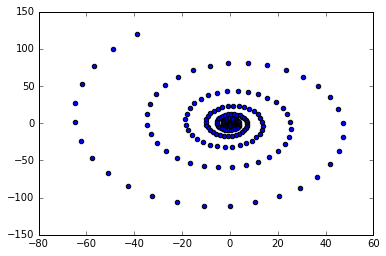

In [11]:
traj = iterateFE(0.1, 200, xv0)
X = [xv[0] for (t, xv) in traj]
V = [xv[1] for (t, xv) in traj]
plt.scatter(X, V)
plt.show()

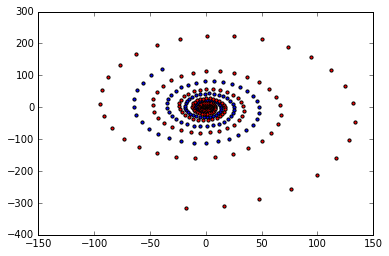

In [12]:
trajA = iterateFE(0.1, 200, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

trajB = iterateFE(0.11, 200, xv0)
Xb = [xv[0] for (t, xv) in trajB]
Vb = [xv[1] for (t, xv) in trajB]


multiscatter(
    (Xa, Va),
    (Xb, Vb)
)

### Backward euler

**Going to do this in vector form**

In [15]:
k, m = 2, 0.5
F = np.array([[0,1], [-k/m, 0]]) # the ode
dt = 0.05

def iterate(next, dt, n, xv0):
    trajectory = [(0, xv0)]
    for i in range(n):
        t = trajectory[-1][0]
        lastPoint = trajectory[-1][1]
        trajectory.append((t + dt, next(lastPoint, dt)))
    return trajectory


xv0 = np.transpose([-1, -2])
iterate(nextForwardEuler, 0.05, 10, xv0)

[(0, array([-1, -2])),
 (0.05, array([-1.1, -1.8])),
 (0.1, array([-1.19, -1.58])),
 (0.15000000000000002, array([-1.269, -1.342])),
 (0.2, array([-1.3361, -1.0882])),
 (0.25, array([-1.39051, -0.82098])),
 (0.3, array([-1.431559, -0.542878])),
 (0.35, array([-1.4587029, -0.2565662])),
 (0.39999999999999997, array([-1.47153121,  0.03517438])),
 (0.44999999999999996, array([-1.46977249,  0.32948062])),
 (0.49999999999999994, array([-1.45329846,  0.62343512]))]

In [14]:
# forward euler sanity check

# xv0 = np.transpose([-1, -2])
# xv1 = xv0 + np.dot(dt*F, xv0)
# print xv1

def nextForwardEuler(xv, dt):
    return xv + np.dot(dt*F, xv)

xv0 = np.transpose([-1, -2])
xv1 = nextForwardEuler(xv0, dt)
print xv1

xv0 = np.transpose([-1, -2])
iterate(nextForwardEuler, 0.05, 10, xv0)

[-1.1 -1.8]


[(0, array([-1, -2])),
 (0.05, array([-1.1, -1.8])),
 (0.1, array([-1.19, -1.58])),
 (0.15000000000000002, array([-1.269, -1.342])),
 (0.2, array([-1.3361, -1.0882])),
 (0.25, array([-1.39051, -0.82098])),
 (0.3, array([-1.431559, -0.542878])),
 (0.35, array([-1.4587029, -0.2565662])),
 (0.39999999999999997, array([-1.47153121,  0.03517438])),
 (0.44999999999999996, array([-1.46977249,  0.32948062])),
 (0.49999999999999994, array([-1.45329846,  0.62343512]))]

In [17]:
I = np.identity(2)

# This was derived by solving for the next point, rather
# than using the next point from forward euler
def nextBackwardEulerWrong(xv, dt):
    return np.dot(np.linalg.inv(I - dt*F), xv) # THIS IS NOT RIGHT

def nextBackwardEuler(xv, dt):
    nextForward = xv + np.dot(dt*F, xv)
    return xv + np.dot(dt*F, nextForward)


In [18]:
xv0 = np.transpose([-1, -2])
iterate(nextBackwardEuler, 0.1, 6, xv0)

[(0, array([-1, -2])),
 (0.1, array([-1.16, -1.52])),
 (0.2, array([-1.2656, -0.9952])),
 (0.30000000000000004, array([-1.314496, -0.449152])),
 (0.4, array([-1.30683136,  0.09461248])),
 (0.5, array([-1.24509686,  0.61356052])),
 (0.6, array([-1.13393693,  1.08705685]))]

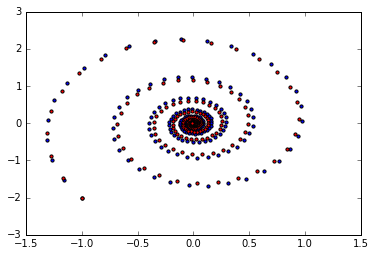

In [19]:
# Comparing two timesteps for backward euler

trajA = iterate(nextBackwardEuler, 0.1, 200, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

trajB = iterate(nextBackwardEuler, 0.11, 200, xv0)
Xb = [xv[0] for (t, xv) in trajB]
Vb = [xv[1] for (t, xv) in trajB]

multiscatter(
    (Xa, Va),
    (Xb, Vb)
)

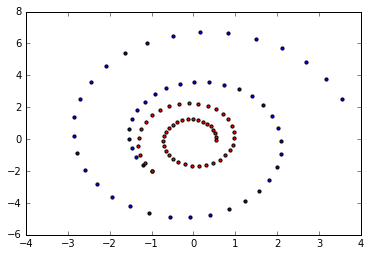

In [20]:
trajA = iterate(nextForwardEuler, 0.1, 50, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

trajB = iterate(nextBackwardEuler, 0.1, 50, xv0)
Xb = [xv[0] for (t, xv) in trajB]
Vb = [xv[1] for (t, xv) in trajB]

multiscatter(
    (Xa, Va),
    (Xb, Vb)
)

### Something made up

**50/50 forward/backward**

... okay I think that this is actually the trapezoidal method

In [21]:
k, m = 2, 0.5
F = np.array([[0,1], [-k/m, 0]]) # the ode
I = np.identity(2)

In [22]:
a = 0.5
def nextMixed(xv, dt):
    nextForward = nextForwardEuler(xv, dt)
#     nextBackward = nextBackwardEuler(xv, dt)
    xvMixed = a*xv + (1-a)*nextForward;
    return xv + np.dot(dt*F, xvMixed)


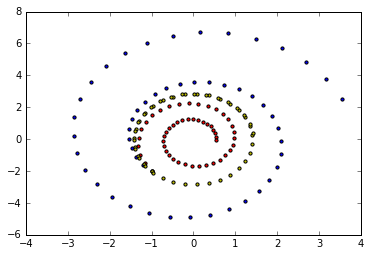

In [23]:
xv0 = np.transpose([-1, -2])
trajA = iterate(nextForwardEuler, 0.1, 50, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

trajB = iterate(nextBackwardEuler, 0.1, 50, xv0)
Xb = [xv[0] for (t, xv) in trajB]
Vb = [xv[1] for (t, xv) in trajB]

trajC = iterate(nextMixed, 0.1, 50, xv0)
Xc = [xv[0] for (t, xv) in trajC]
Vc = [xv[1] for (t, xv) in trajC]

multiscatter(
    (Xa, Va),
    (Xb, Vb),
    (Xc, Vc)
)

In [34]:
k, m = 2, 0.5
xv0 = np.transpose([-1, -2])

iterate(nextMixed, 0.05, 11, xv0)

[(0, array([-1, -2])),
 (0.05, array([-1.095, -1.79 ])),
 (0.1, array([-1.179025, -1.56205 ])),
 (0.15000000000000002, array([-1.25123238, -1.31843475])),
 (0.2, array([-1.31089795, -1.0615961 ])),
 (0.25, array([-1.35742327, -0.79410853])),
 (0.3, array([-1.39034158, -0.51865333])),
 (0.35, array([-1.40932253, -0.23799175])),
 (0.39999999999999997, array([-1.41417551,  0.04506271])),
 (0.44999999999999996, array([-1.4048515,  0.3276725])),
 (0.49999999999999994, array([-1.38144361,  0.60700444])),
 (0.5499999999999999, array([-1.34418617,  0.88025814]))]

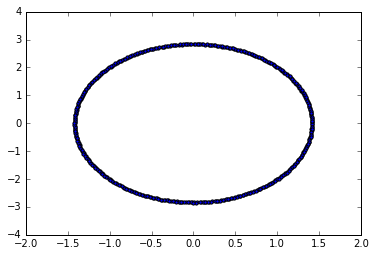

In [25]:
trajA = iterate(nextMixed, 0.05, 500, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

multiscatter(
    (Xa, Va)
)

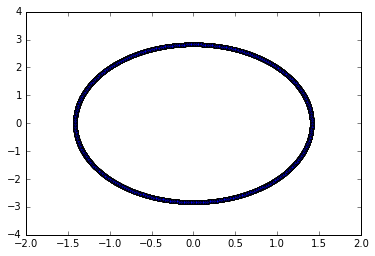

In [26]:
trajA = iterate(nextMixed, 0.01, 5000, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

multiscatter(
    (Xa, Va)
)

### RK 4

In [27]:
k, m = 2, 0.5
F = np.array([[0,1], [-k/m, 0]]) # the ode
I = np.identity(2)

In [28]:
def nextRK4(xv, dt):
    k1 = np.dot(F, xv)
    k2 = np.dot(F, (xv + (dt/2)*k1))
    k3 = np.dot(F, (xv + (dt/2)*k2))
    k4 = np.dot(F, (xv + dt*k3))
    
    return xv + (dt/6)*(k1 + 2*k2 + 2*k3 + k4);

In [29]:
xv0 = np.transpose([-1, -2])
k1 = np.dot(F, xv)
k2 = np.dot(F, (xv + (dt/2)*k1))

print(k1)


[-2.73283604  1.46042093]


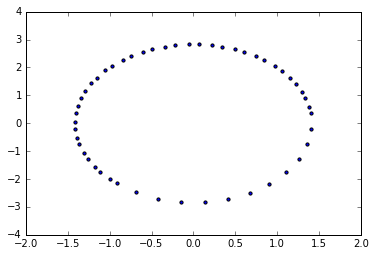

In [30]:
xv0 = np.transpose([-1, -2])
trajA = iterate(nextRK4, 0.1, 50, xv0)
Xa = [xv[0] for (t, xv) in trajA]
Va = [xv[1] for (t, xv) in trajA]

multiscatter(
    (Xa, Va)
)

#### Lorenz system

In [48]:
math.log(3)/math.log(5)

0.6826061944859854

In [68]:
def c(n,m): return math.log(m*1.0-n) / math.log(m*1.0)

In [55]:
c(2,5)

0.6826061944859854

In [56]:
c(1,5)

0.8613531161467861

In [57]:
c(1,3)

0.6309297535714574

In [69]:
[c(1,3), c(2,5), c(1,5)]

[0.6309297535714574, 0.6826061944859854, 0.8613531161467861]

In [70]:
1./3, 2./5, 1./5

(0.3333333333333333, 0.4, 0.2)

In [74]:
math.log(2)/math.log(5./2)

0.75647079736603

In [75]:
2./3, 3./5, 4./5

(0.6666666666666666, 0.6, 0.8)